<a href="https://colab.research.google.com/github/MerveKaragulTabas/DL--Deep-Learning/blob/main/DL_Assignmet_3_(RNN_Time_Series_Frozen_Dessert_Production).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [4]:
df = pd.read_csv('Frozen_Dessert_Production.csv', index_col='DATE', parse_dates=True)

In [5]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [6]:
df = df.rename(columns={'IPN31152N' : 'IceCream'})

In [7]:
df

,IceCream
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IceCream  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


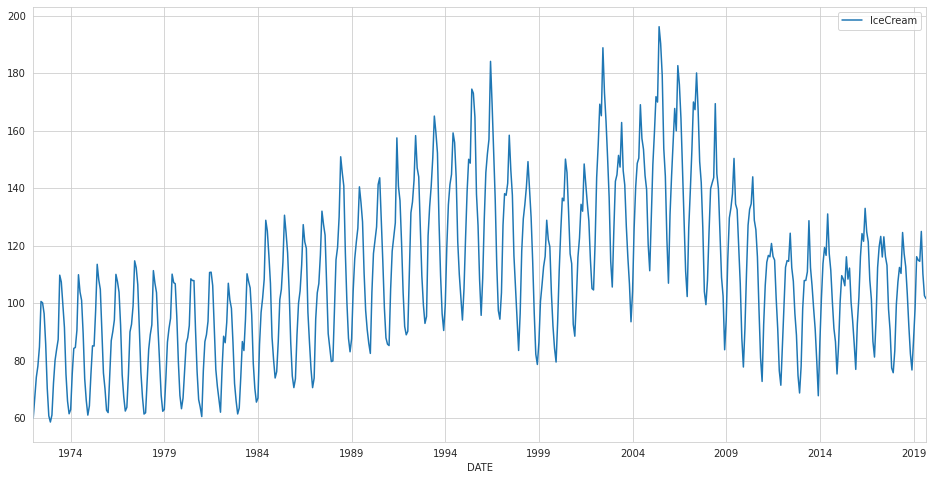

In [9]:
df.plot(figsize=(16,8));

## Preprocessing of Data

### Train Test Split

In [10]:
len(df)

573

In [11]:
test_size = 24

In [12]:
test_ind = len(df)- test_size
test_ind

549

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [15]:
train

,IceCream
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-05-01,116.064
2017-06-01,123.087
2017-07-01,116.264


In [16]:
test

,IceCream
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


### Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [23]:
len(generator)

537

In [24]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]), array([[0.01774221]]))

In [25]:
X, y = generator[0]

In [27]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


## Modelling & Model Performance

### Import related libraries

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Creating Model

### with "tanh" activation function

In [29]:
n_features = train_scaled.shape[1]

In [30]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [32]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [33]:
len(validation_generator)

12

In [34]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator
                   )

Epoch 1/20
537/537 [==============================] - 13s 12ms/step - loss: 0.0171 - val_loss: 0.0027
Epoch 2/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 3/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 4/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 5/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 6/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0038 - val_loss: 0.0023
Epoch 7/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 8/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 9/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 10/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0034 - val_loss: 0.0

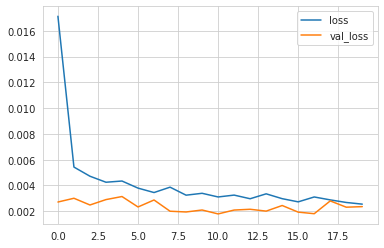

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [38]:
predictions_scaled = []

In [39]:
first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features)) 

In [40]:
for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [41]:
predictions_scaled

[array([0.20178285], dtype=float32),
 array([0.17383927], dtype=float32),
 array([0.20179564], dtype=float32),
 array([0.26060686], dtype=float32),
 array([0.31544706], dtype=float32),
 array([0.35875803], dtype=float32),
 array([0.39905918], dtype=float32),
 array([0.42587775], dtype=float32),
 array([0.4161513], dtype=float32),
 array([0.36200976], dtype=float32),
 array([0.27987418], dtype=float32),
 array([0.19612816], dtype=float32)]

In [42]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.6326701477168426 
mae: 0.05620395890961425 
mse: 0.004580837905941211 
rmse: 0.06768188757667158


In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
model_early = Sequential()
model_early.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model_early.add(LSTM(50, activation = 'tanh'))
model_early.add(Dense(1))
model_early.compile(optimizer = 'adam', loss = 'mse')

In [45]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [46]:
model_early.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 10s 10ms/step - loss: 0.0243 - val_loss: 0.0032
Epoch 2/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0051 - val_loss: 0.0022
Epoch 3/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0044 - val_loss: 0.0019
Epoch 4/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0041 - val_loss: 0.0018
Epoch 5/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0039 - val_loss: 0.0019
Epoch 6/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 7/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 8/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 9/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0031 - val_loss: 0.0027


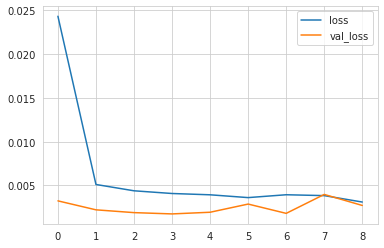

In [47]:
loss_df = pd.DataFrame(model_early.history.history)
loss_df.plot();

In [48]:
predictions_scaled = []

In [49]:
first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [50]:
for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model_early.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [51]:
predictions_scaled

[array([0.19864202], dtype=float32),
 array([0.16913441], dtype=float32),
 array([0.19930233], dtype=float32),
 array([0.25937074], dtype=float32),
 array([0.31939518], dtype=float32),
 array([0.3681373], dtype=float32),
 array([0.4037242], dtype=float32),
 array([0.4212711], dtype=float32),
 array([0.41410953], dtype=float32),
 array([0.36634427], dtype=float32),
 array([0.28450975], dtype=float32),
 array([0.18992525], dtype=float32)]

In [52]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.6351605550548404 
mae: 0.05681786564082242 
mse: 0.0045497809355800325 
rmse: 0.06745206398309864


#### Inverse Transformations and Comparing

In [53]:
predictions = scaler.inverse_transform(predictions_scaled)

In [54]:
compare = test[:12]

In [55]:
compare['Predictions'] = predictions

In [56]:
compare

,IceCream,Predictions
DATE,,
2017-10-01,90.473,85.976
2017-11-01,77.438,81.918
2017-12-01,75.812,86.067
2018-01-01,83.434,94.327
2018-02-01,99.490,102.581
2018-03-01,107.315,109.284
2018-04-01,112.431,114.177
2018-05-01,110.354,116.590
2018-06-01,124.584,115.606


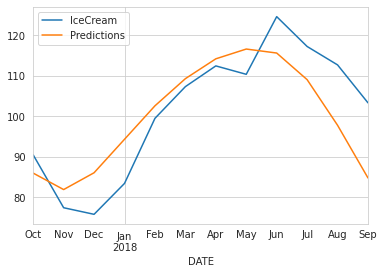

In [57]:
compare.plot();

#### Calculation R2 Score and Error Metrics

In [58]:
eval_metrics(compare.IceCream, compare.Predictions)

r2_score: 0.6351605550548403 
mae: 7.813246293945486 
mse: 86.03668822999946 
rmse: 9.27559638136543


### with "relu" activation function

In [59]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator
                    )

Epoch 1/20
537/537 [==============================] - 40s 67ms/step - loss: 0.0309 - val_loss: 0.0045
Epoch 2/20
537/537 [==============================] - 36s 67ms/step - loss: 0.0112 - val_loss: 0.0030
Epoch 3/20
537/537 [==============================] - 36s 66ms/step - loss: 0.0066 - val_loss: 0.0039
Epoch 4/20
537/537 [==============================] - 36s 67ms/step - loss: 0.0059 - val_loss: 0.0048
Epoch 5/20
537/537 [==============================] - 36s 66ms/step - loss: 0.0067 - val_loss: 0.0023
Epoch 6/20
537/537 [==============================] - 36s 66ms/step - loss: 0.0052 - val_loss: 0.0037
Epoch 7/20
537/537 [==============================] - 36s 66ms/step - loss: 0.0055 - val_loss: 0.0022
Epoch 8/20
537/537 [==============================] - 36s 66ms/step - loss: 0.0051 - val_loss: 0.0017
Epoch 9/20
537/537 [==============================] - 36s 66ms/step - loss: 0.0045 - val_loss: 0.0024
Epoch 10/20
537/537 [==============================] - 36s 66ms/step - loss: 0.004

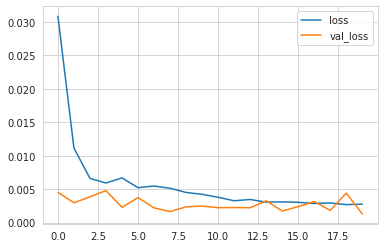

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [63]:
predictions_scaled = []

In [64]:
first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [65]:
for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [66]:
predictions_scaled

[array([0.2571944], dtype=float32),
 array([0.2140095], dtype=float32),
 array([0.22805631], dtype=float32),
 array([0.3059089], dtype=float32),
 array([0.3845767], dtype=float32),
 array([0.43694168], dtype=float32),
 array([0.47170827], dtype=float32),
 array([0.48644748], dtype=float32),
 array([0.47871315], dtype=float32),
 array([0.4322395], dtype=float32),
 array([0.3724193], dtype=float32),
 array([0.29111096], dtype=float32)]

In [67]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.5451843267668044 
mae: 0.06295293741425027 
mse: 0.005671841978573444 
rmse: 0.07531163242536602


In [68]:
model_early2 = Sequential()
model_early2.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model_early2.add(LSTM(50, activation = 'relu'))
model_early2.add(Dense(1))
model_early2.compile(optimizer = 'adam', loss = 'mse')

In [69]:
model_early2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_7 (LSTM)               (None, 50)                30200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [70]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [71]:
model_early2.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 40s 67ms/step - loss: 0.0266 - val_loss: 0.0062
Epoch 2/20
537/537 [==============================] - 35s 66ms/step - loss: 0.0119 - val_loss: 0.0154
Epoch 3/20
537/537 [==============================] - 35s 65ms/step - loss: 0.0084 - val_loss: 0.0019
Epoch 4/20
537/537 [==============================] - 35s 66ms/step - loss: 0.0074 - val_loss: 0.0048
Epoch 5/20
537/537 [==============================] - 35s 65ms/step - loss: 0.0066 - val_loss: 0.0023
Epoch 6/20
537/537 [==============================] - 35s 65ms/step - loss: 0.0065 - val_loss: 0.0028
Epoch 7/20
537/537 [==============================] - 35s 65ms/step - loss: 0.0067 - val_loss: 0.0015
Epoch 8/20
537/537 [==============================] - 36s 66ms/step - loss: 0.0055 - val_loss: 0.0038
Epoch 9/20
537/537 [==============================] - 35s 65ms/step - loss: 0.0058 - val_loss: 0.0026
Epoch 10/20
537/537 [==============================] - 35s 65ms/step - loss: 0.004

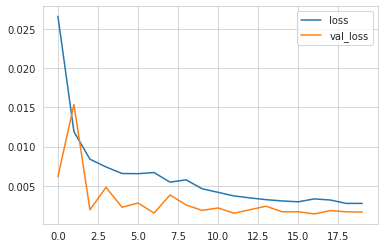

In [72]:
loss_df = pd.DataFrame(model_early2.history.history)
loss_df.plot()

In [73]:
predictions_scaled = []

In [74]:
first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [75]:
for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model_early2.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [76]:
predictions_scaled

[array([0.26085335], dtype=float32),
 array([0.20108591], dtype=float32),
 array([0.20615211], dtype=float32),
 array([0.30660522], dtype=float32),
 array([0.4087333], dtype=float32),
 array([0.47733623], dtype=float32),
 array([0.51639867], dtype=float32),
 array([0.53535956], dtype=float32),
 array([0.52882665], dtype=float32),
 array([0.4884243], dtype=float32),
 array([0.4157381], dtype=float32),
 array([0.33063704], dtype=float32)]

In [77]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.30858383201545536 
mae: 0.08024066791374553 
mse: 0.008622401287011984 
rmse: 0.09285688605058853


#### Inverse Transformations and Comparing

In [78]:
predictions = scaler.inverse_transform(predictions_scaled)

In [79]:
compare = test[:12]

In [80]:
compare['Predictions'] = predictions

In [81]:
compare

,IceCream,Predictions
DATE,,
2017-10-01,90.473,94.531
2017-11-01,77.438,86.312
2017-12-01,75.812,87.009
2018-01-01,83.434,100.822
2018-02-01,99.490,114.866
2018-03-01,107.315,124.300
2018-04-01,112.431,129.672
2018-05-01,110.354,132.279
2018-06-01,124.584,131.381


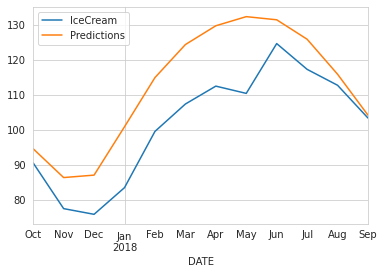

In [82]:
compare.plot();

#### Calculation R2 Score and Error Metrics

In [83]:
eval_metrics(compare.IceCream, compare.Predictions)

r2_score: 0.30858383201545614 
mae: 11.034207183424002 
mse: 163.05023512742392 
rmse: 12.769112542672021


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [84]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [85]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [86]:
len(df)

573

In [87]:
len(generator)

561

In [88]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [89]:
model.fit_generator(generator, epochs=16)

Epoch 1/16
561/561 [==============================] - 10s 8ms/step - loss: 0.0206
Epoch 2/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0053
Epoch 3/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0048
Epoch 4/16
561/561 [==============================] - 5s 8ms/step - loss: 0.0038
Epoch 5/16
561/561 [==============================] - 5s 8ms/step - loss: 0.0038
Epoch 6/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0038
Epoch 7/16
561/561 [==============================] - 5s 8ms/step - loss: 0.0031
Epoch 8/16
561/561 [==============================] - 5s 8ms/step - loss: 0.0034
Epoch 9/16
561/561 [==============================] - 5s 8ms/step - loss: 0.0032
Epoch 10/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0031
Epoch 11/16
561/561 [==============================] - 5s 8ms/step - loss: 0.0030
Epoch 12/16
561/561 [==============================] - 5s 9ms/step - loss: 0.0030
Epoch 13/16
561/561 [===

In [90]:
scaled_full_data.shape

(573, 1)

In [91]:
scaled_full_data[-length:].shape

(12, 1)

In [92]:
forecast = []
# Replace periods with whatever forecast length you want

In [93]:
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [94]:
for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)


In [95]:
forecast = scaler.inverse_transform(forecast)

In [96]:
forecast

array([[ 90.14472743],
       [ 82.98895955],
       [ 83.18452316],
       [ 89.16972692],
       [ 96.52863808],
       [102.67740235],
       [107.42881239],
       [111.10136245],
       [112.54918641],
       [109.88188387],
       [104.08459642],
       [ 96.32564848]])

In [97]:
df

,IceCream
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [98]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [99]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [100]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [101]:
forecast_df

,Forecast
2019-10-01,90.145
2019-11-01,82.989
2019-12-01,83.185
2020-01-01,89.170
2020-02-01,96.529
2020-03-01,102.677
2020-04-01,107.429
2020-05-01,111.101
2020-06-01,112.549
2020-07-01,109.882


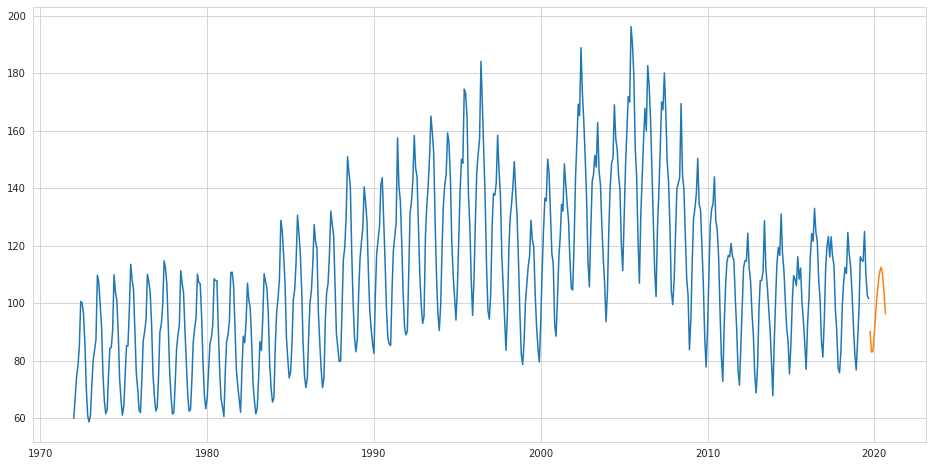

In [103]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['IceCream'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

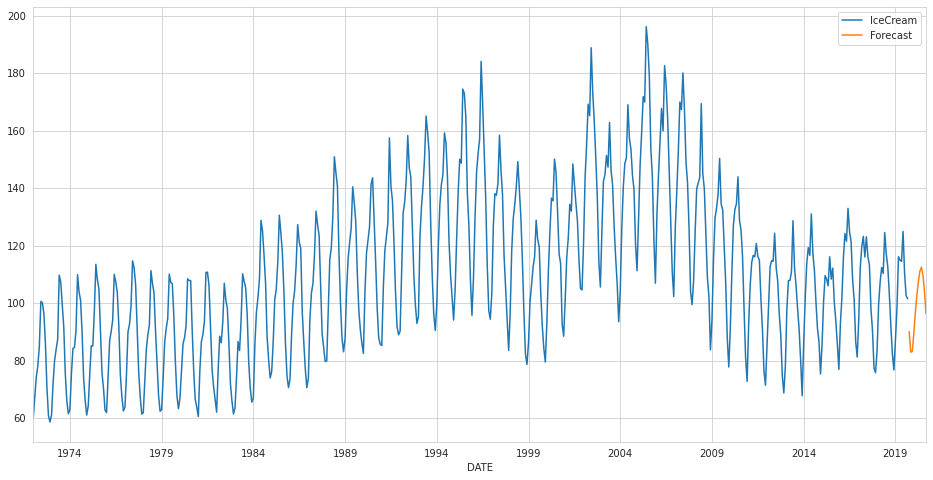

In [104]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(584.0, 608.0)

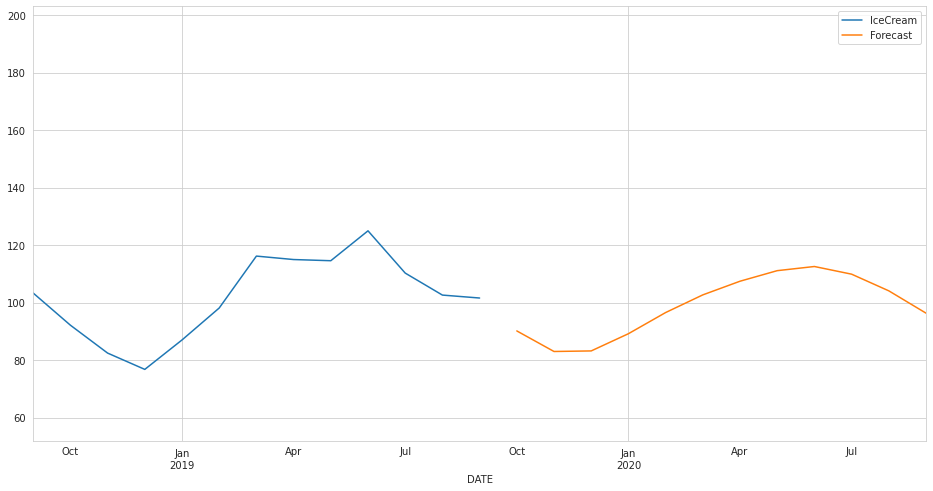

In [105]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-09-01', '2020-09-01')